In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
df = pd.read_csv("../data/raw_data/loan_approval_data.csv")
df1 = df.copy()

In [3]:
df1.head()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,1.0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2.0,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,NaN,Car,Semiurban,Graduate,NaN,Private,No
2,3.0,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,NaN,Urban,NaN,Female,Government,Yes
3,4.0,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,5.0,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,NaN,Graduate,Male,Private,Yes


In [4]:
df1.info()

<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Applicant_ID        950 non-null    float64
 1   Applicant_Income    950 non-null    float64
 2   Coapplicant_Income  950 non-null    float64
 3   Employment_Status   950 non-null    str    
 4   Age                 950 non-null    float64
 5   Marital_Status      950 non-null    str    
 6   Dependents          950 non-null    float64
 7   Credit_Score        950 non-null    float64
 8   Existing_Loans      950 non-null    float64
 9   DTI_Ratio           950 non-null    float64
 10  Savings             950 non-null    float64
 11  Collateral_Value    950 non-null    float64
 12  Loan_Amount         950 non-null    float64
 13  Loan_Term           950 non-null    float64
 14  Loan_Purpose        950 non-null    str    
 15  Property_Area       950 non-null    str    
 16  Education_Level   

In [5]:
df1.isnull().sum()

Applicant_ID          50
Applicant_Income      50
Coapplicant_Income    50
Employment_Status     50
Age                   50
Marital_Status        50
Dependents            50
Credit_Score          50
Existing_Loans        50
DTI_Ratio             50
Savings               50
Collateral_Value      50
Loan_Amount           50
Loan_Term             50
Loan_Purpose          50
Property_Area         50
Education_Level       50
Gender                50
Employer_Category     50
Loan_Approved         50
dtype: int64

In [6]:
df1.describe()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000
mean,501.220000,10852.571579,5082.455789,39.971579,1.474737,676.033684,1.950526,0.347263,9940.452632,24802.792632,20522.825263,48.000000
std,289.608451,5061.632859,2943.161570,11.139797,1.105067,71.346015,1.406246,0.144341,5860.736885,14345.696031,11504.142575,24.245322
min,1.000000,2009.000000,1.000000,21.000000,0.000000,550.000000,0.000000,0.100000,65.000000,36.000000,1015.000000,12.000000
25%,250.250000,6730.750000,2472.750000,30.250000,1.000000,616.250000,1.000000,0.220000,4760.250000,12698.250000,9806.250000,24.000000
50%,499.500000,10548.000000,5205.500000,40.000000,1.000000,678.000000,2.000000,0.340000,9880.500000,24321.000000,21210.500000,48.000000
75%,752.750000,15190.000000,7620.750000,49.000000,2.000000,737.000000,3.000000,0.480000,15074.500000,36947.000000,30263.000000,72.000000
max,1000.000000,19988.000000,9996.000000,59.000000,3.000000,799.000000,4.000000,0.600000,19996.000000,49954.000000,39995.000000,84.000000


## Handle Missing Values

In [7]:
categorical_cols = df1.select_dtypes(include = ['str']).columns
numerical_cols = df1.select_dtypes(include = ['float64']).columns

In [8]:
categorical_cols

Index(['Employment_Status', 'Marital_Status', 'Loan_Purpose', 'Property_Area',
       'Education_Level', 'Gender', 'Employer_Category', 'Loan_Approved'],
      dtype='str')

In [9]:
numerical_cols

Index(['Applicant_ID', 'Applicant_Income', 'Coapplicant_Income', 'Age',
       'Dependents', 'Credit_Score', 'Existing_Loans', 'DTI_Ratio', 'Savings',
       'Collateral_Value', 'Loan_Amount', 'Loan_Term'],
      dtype='str')

In [10]:
num_imp = SimpleImputer(strategy = 'mean')
df1[numerical_cols] = num_imp.fit_transform(df1[numerical_cols])

In [11]:
cat_imp = SimpleImputer(strategy = 'most_frequent') # mode
df1[categorical_cols] = cat_imp.fit_transform(df1[categorical_cols])

In [12]:
df1.isnull().sum()

Applicant_ID          0
Applicant_Income      0
Coapplicant_Income    0
Employment_Status     0
Age                   0
Marital_Status        0
Dependents            0
Credit_Score          0
Existing_Loans        0
DTI_Ratio             0
Savings               0
Collateral_Value      0
Loan_Amount           0
Loan_Term             0
Loan_Purpose          0
Property_Area         0
Education_Level       0
Gender                0
Employer_Category     0
Loan_Approved         0
dtype: int64

## EDA

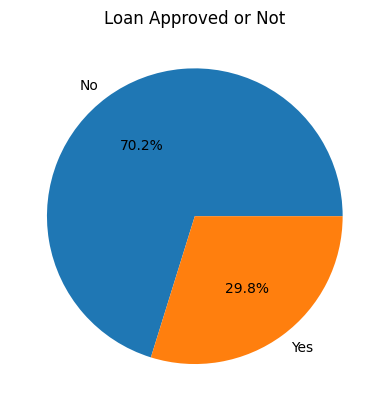

In [13]:
# check the balance of classes
classes_count = df1['Loan_Approved'].value_counts()
plt.pie(classes_count, labels = ['No', 'Yes'], autopct = '%1.1f%%')
plt.title('Loan Approved or Not')
plt.show()

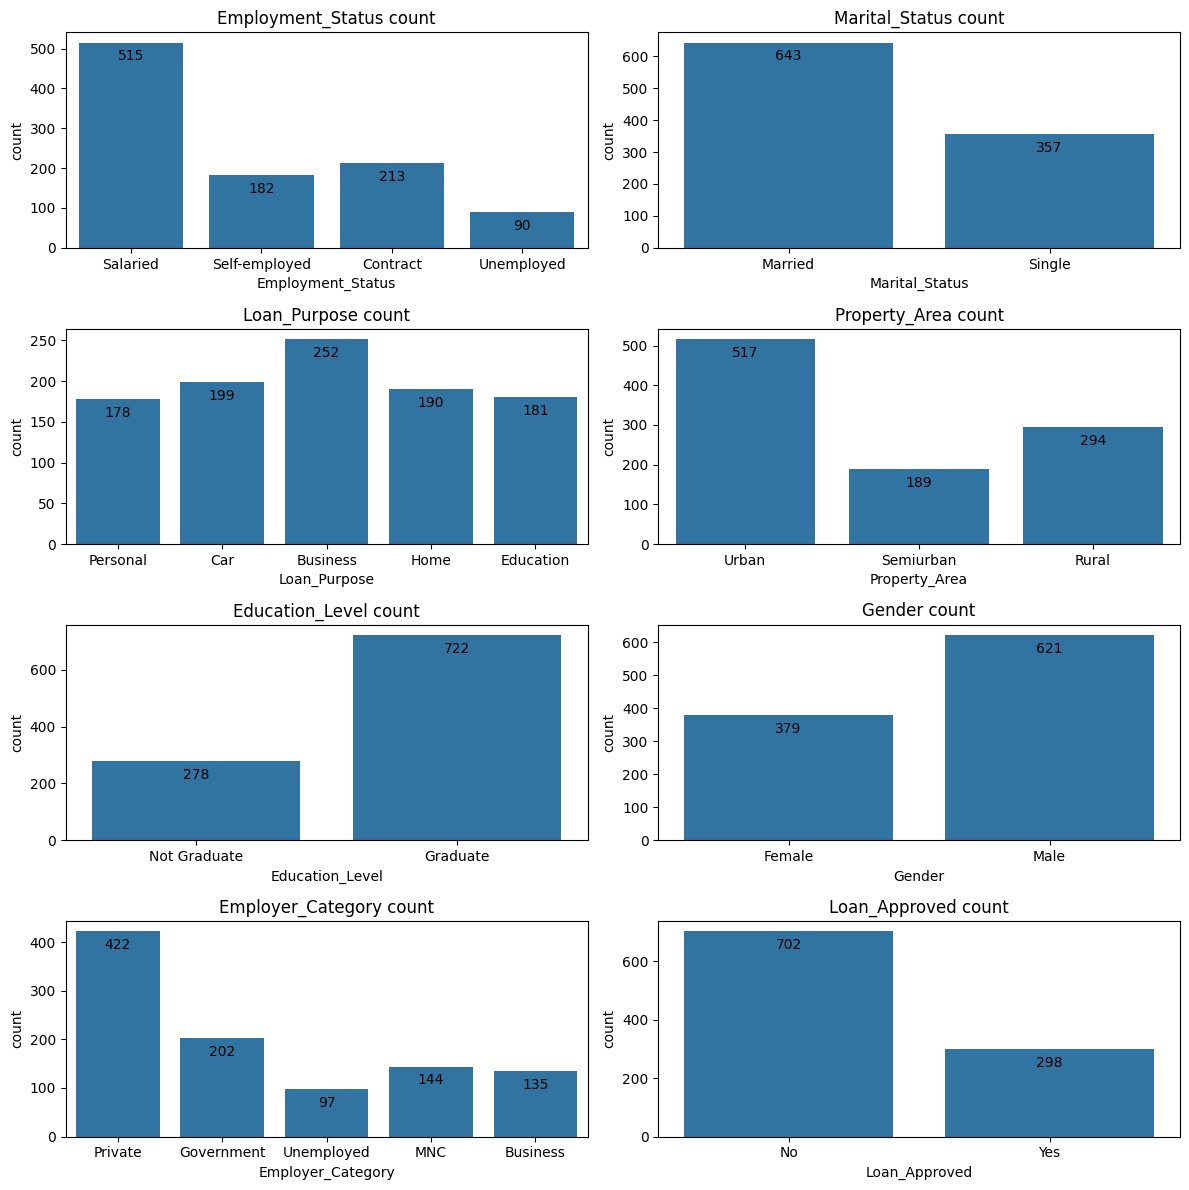

In [14]:
fig, ax = plt.subplots(4, 2, figsize = (12, 12))
ax = ax.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(ax = ax[i], data = df1, x = col)
    ax[i].set_title(f'{col} count')
    for container in ax[i].containers:
        ax[i].bar_label(container, padding = -15)

fig.tight_layout()

<Axes: xlabel='Applicant_Income', ylabel='Count'>

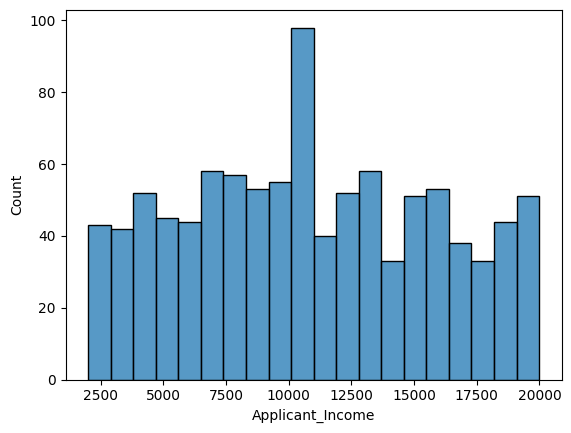

In [15]:
# analyze income
sns.histplot (
    data = df1,
    x = 'Applicant_Income',
    bins = 20
)

<Axes: xlabel='Coapplicant_Income', ylabel='Count'>

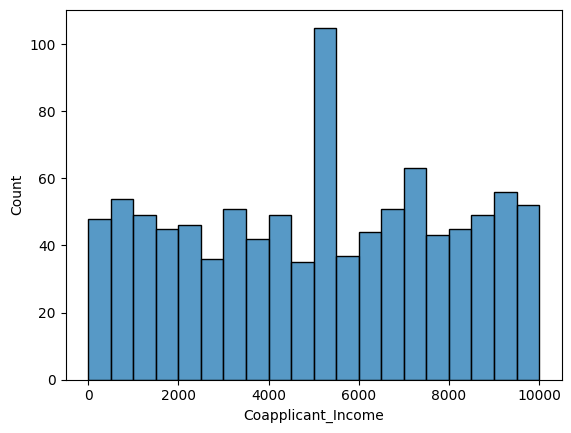

In [16]:
sns.histplot (
    data = df1,
    x = 'Coapplicant_Income',
    bins = 20
)

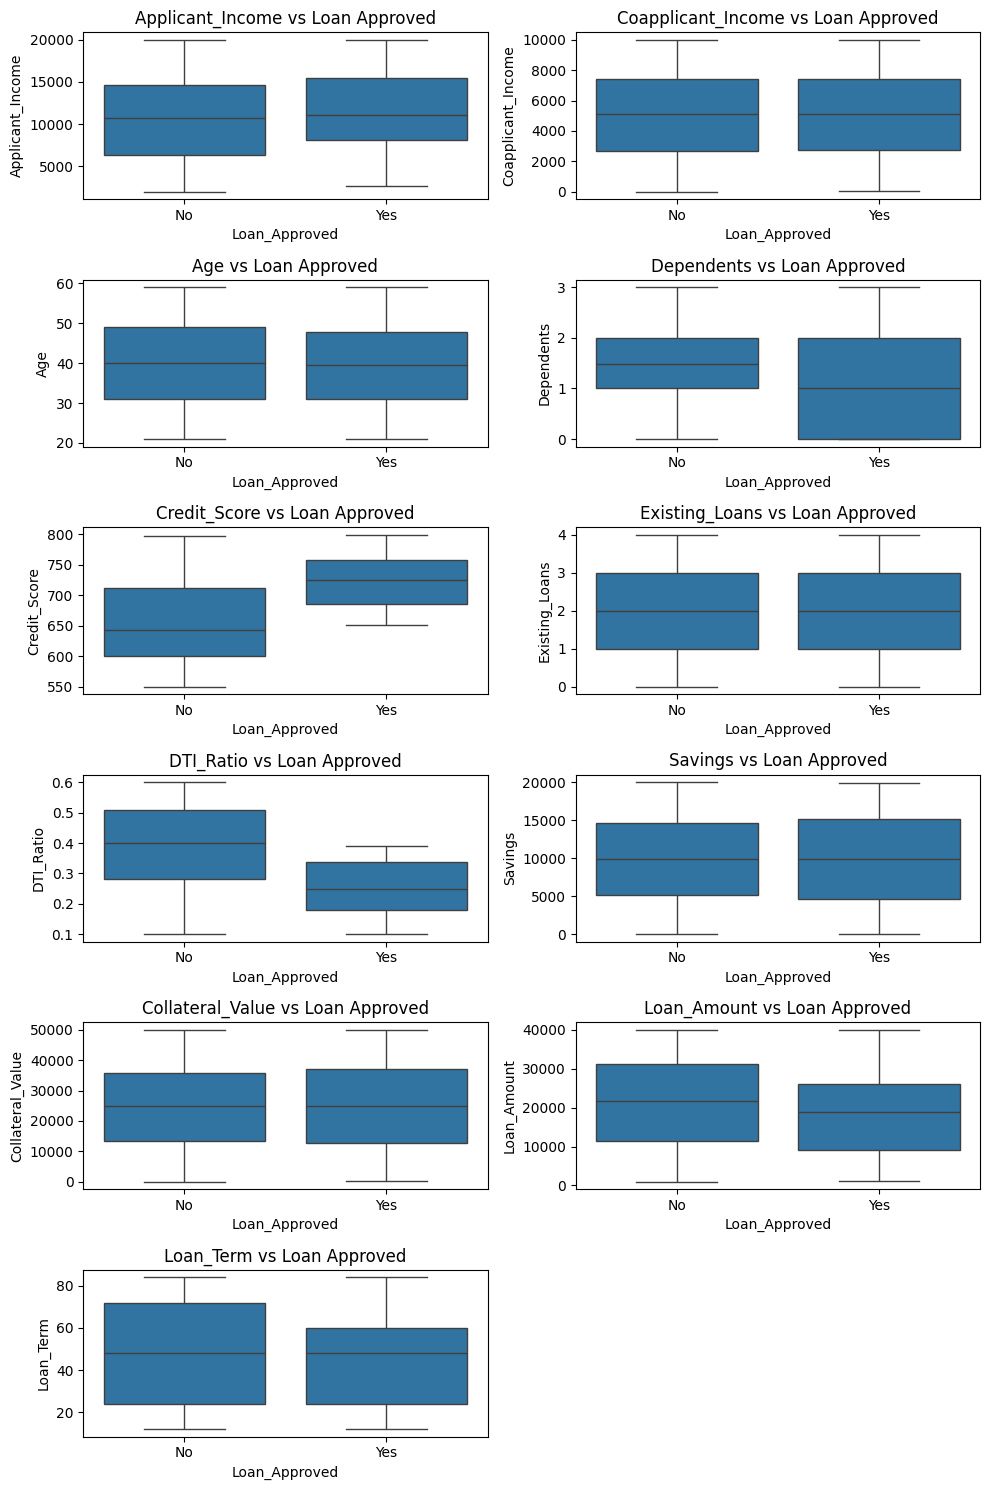

In [17]:
# detect outliers -> boxplots
cols = numerical_cols[1:]

fig, ax = plt.subplots(6, 2, figsize = (10, 15))
ax = ax.flatten()

for i, col in enumerate(cols):
    sns.boxplot(ax = ax[i], data = df1, x = 'Loan_Approved', y = col)
    ax[i].set_title(f'{col} vs Loan Approved')

fig.delaxes(ax[11])
fig.tight_layout()
plt.show()

<Axes: xlabel='Credit_Score', ylabel='Count'>

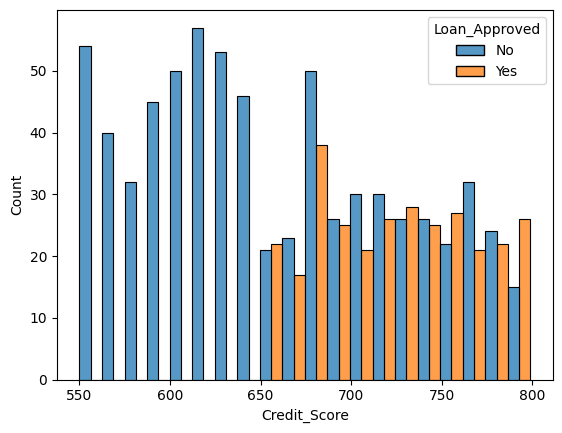

In [18]:
# relation of Credit Score with Loan Approved

sns.histplot (
    data = df1,
    x = 'Credit_Score', 
    hue = 'Loan_Approved',
    bins = 20,
    multiple = 'dodge'
)

<Axes: xlabel='Applicant_Income', ylabel='Count'>

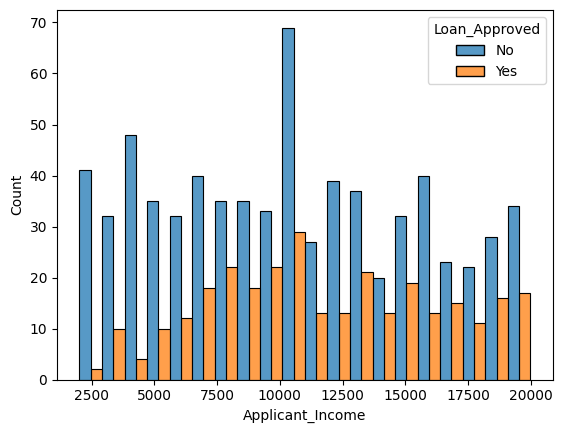

In [19]:
# relation between applicant income and loan approved
sns.histplot (
    data = df1,
    x = 'Applicant_Income', 
    hue = 'Loan_Approved',
    bins = 20,
    multiple = 'dodge'
)

In [20]:
# Remove Applicant ID
df1 = df1.drop('Applicant_ID', axis = 1)

In [21]:
df1.columns

Index(['Applicant_Income', 'Coapplicant_Income', 'Employment_Status', 'Age',
       'Marital_Status', 'Dependents', 'Credit_Score', 'Existing_Loans',
       'DTI_Ratio', 'Savings', 'Collateral_Value', 'Loan_Amount', 'Loan_Term',
       'Loan_Purpose', 'Property_Area', 'Education_Level', 'Gender',
       'Employer_Category', 'Loan_Approved'],
      dtype='str')

## Encoding

In [22]:
le = LabelEncoder()
df1['Education_Level'] = le.fit_transform(df1['Education_Level'])
df1['Loan_Approved'] = le.fit_transform(df1['Loan_Approved'])

In [23]:
cols = ['Employment_Status', 'Marital_Status', 'Loan_Purpose', 
        'Property_Area', 'Gender', 'Employer_Category']

ohe = OneHotEncoder(drop = 'first', sparse_output = False, handle_unknown = 'ignore')
encoded = ohe.fit_transform(df1[cols])

encoded_df1 = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(cols), index = df1.index)

df1 = pd.concat([df1.drop(columns = cols), encoded_df1], axis = 1)

## Correlation Heatmap

In [24]:
num_cols = df1.select_dtypes(include = 'number')
corr_matrix = num_cols.corr()

In [25]:
num_cols.corr()['Loan_Approved'].sort_values(ascending = False)

Loan_Approved                      1.000000
Credit_Score                       0.451175
Applicant_Income                   0.119796
Employer_Category_MNC              0.069049
Loan_Purpose_Personal              0.034043
Marital_Status_Single              0.030182
Property_Area_Urban                0.025963
Collateral_Value                   0.021868
Coapplicant_Income                 0.004230
Loan_Purpose_Home                  0.002118
Employment_Status_Self-employed   -0.001337
Employer_Category_Private         -0.003347
Property_Area_Semiurban           -0.012967
Savings                           -0.013437
Loan_Purpose_Education            -0.016684
Employer_Category_Unemployed      -0.021468
Age                               -0.022343
Dependents                        -0.023811
Existing_Loans                    -0.034794
Employer_Category_Government      -0.039187
Employment_Status_Salaried        -0.041428
Employment_Status_Unemployed      -0.044464
Education_Level                 

<Axes: >

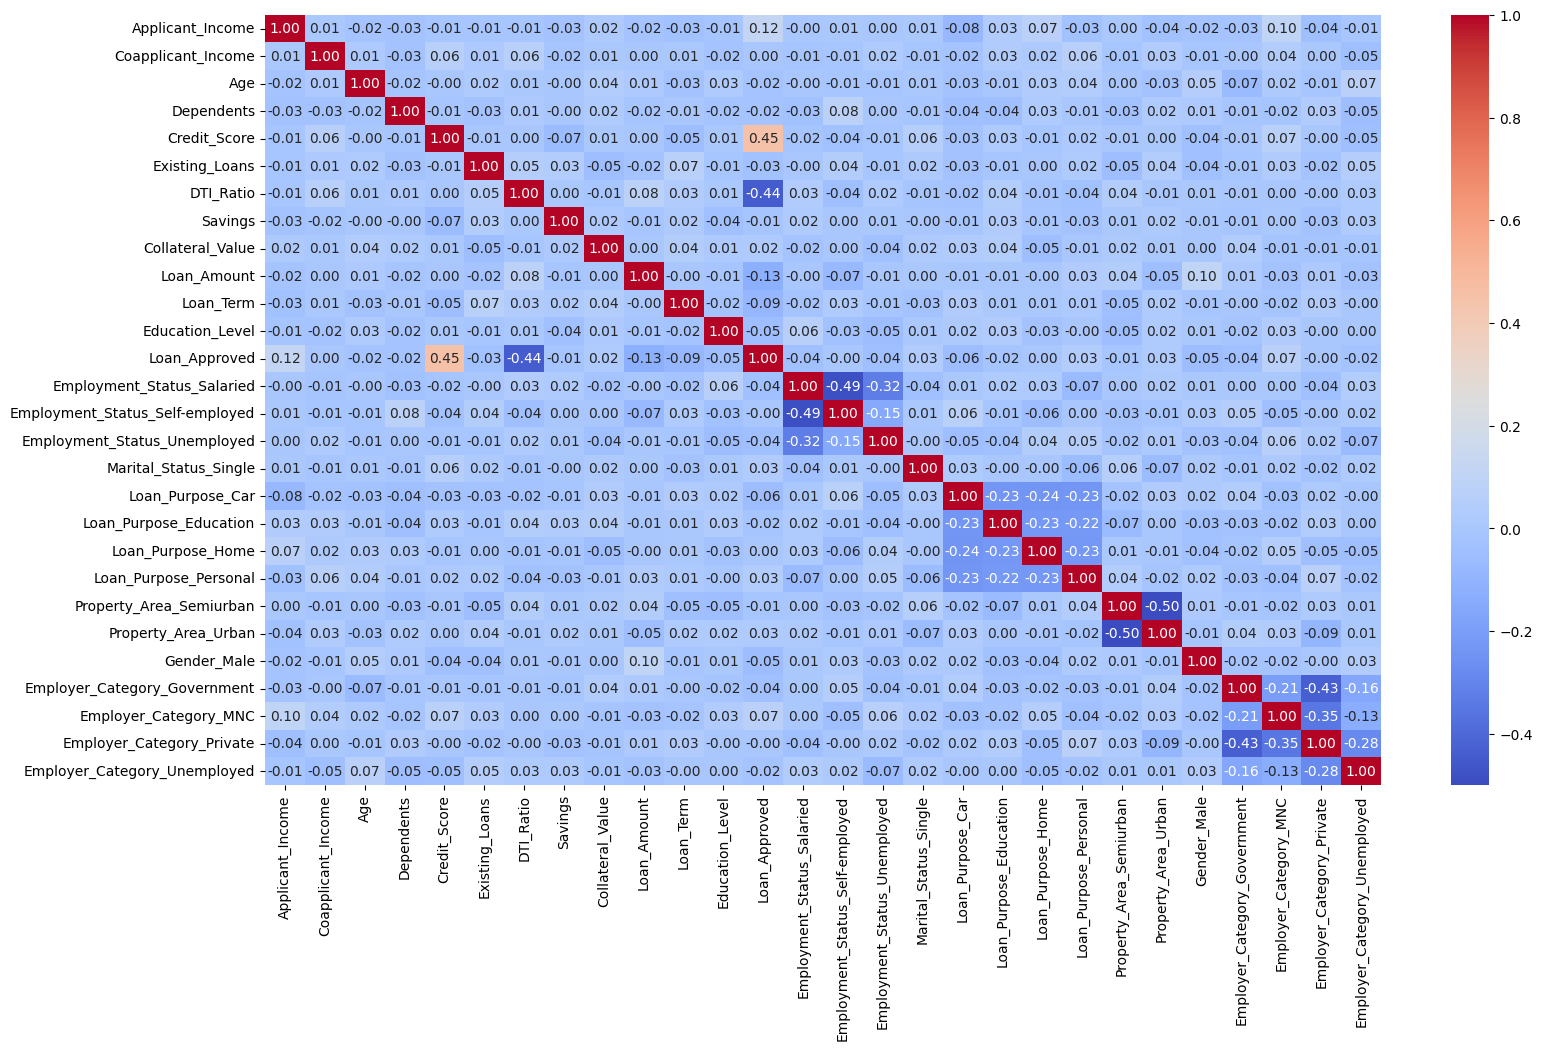

In [26]:
plt.figure(figsize = (18, 10))
sns.heatmap(
    corr_matrix,
    annot = True,
    fmt = '.2f',
    cmap = 'coolwarm'
)

In [29]:
df1.to_csv('../data/processed_data/processed_data.csv', index = False)